In [22]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LogFormatterSciNotation
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
import os
import sys
from datetime import timedelta, date
import csv
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime
okabe_ito = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
sns.set_context('paper')
sns.set_palette(sns.color_palette(okabe_ito))
#sns.set_palette("Set1", n_colors=9, desat=.75)
def make_cdf(series):
    return series.value_counts(normalize=True).sort_index().cumsum()

def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
mpl.rcParams['figure.dpi'] = 175

In [45]:
conn_tech = sqlite3.connect("../agg-data/unit-profile.db")
df_tech = pd.read_sql_query('select * from "unit-profile"', conn_tech)



#fix AT&T IPBB
df_tech['technology'] = np.where(df_tech.isp == 'AT&T IPBB', 'DSL', df_tech.technology)
df_tech['technology'] = np.where(df_tech.technology == 'IPBB', 'DSL', df_tech.technology)
df_tech['technology'] = np.where(df_tech.technology == 'UVERSE', 'DSL', df_tech.technology)

def isp_names(df, column):
    df[column] = np.where(df[column].str.startswith("Verizon"), 'Verizon', df[column])
    df[column] = np.where(df[column] == "TimeWarner", 'Time Warner Cable', df[column])
    #df[column] = np.where(df[column] == "Cablevision", 'Cablevision/Optimum', df[column])
    #df[column] = np.where(df[column] == "Optimum", 'Cablevision/Optimum', df[column])
    df[column] = np.where(df[column].str.startswith("Frontier"), 'Frontier', df[column])
    df[column] = np.where(df[column] == "Qwest", 'CenturyLink', df[column])
    df[column] = np.where(df[column].str.startswith("Cincinnati Bell"), 'Cincinnati Bell', df[column])
    df[column] = np.where(df[column].str.startswith("AT&T"), 'AT&T', df[column])
    df[column] = np.where(df[column] == "TWC", 'Time Warner Cable', df[column])
    
isp_names(df_tech, 'isp')
conn_tech.close()

In [46]:
use_report_years = True

In [49]:
if use_report_years:
    df_tech_for_merge = pd.DataFrame()
    for year in df_tech.year.unique():
        #print(year)
        if year == '2012':
            df_tmp = df_tech[df_tech.year == '2012']
            df_tmp_for_append = df_tmp[df_tmp.month == '04'].copy()
            df_tech_for_merge = pd.concat([df_tech_for_merge, df_tmp_for_append], ignore_index=True)
            df_tmp_for_append = df_tmp[df_tmp.month == '09'].copy()
            df_tmp_for_append['year'] = '2013'
            #list_2012_newer_units = df_tmp_for_append.unit_id.to_list()
            #list_2012_older_units = df_tmp[df_tmp.month == '04'].unit_id.to_list()
            #for unit_id in list_2012_older_units:
            #    if not unit_id in list_2012_newer_units:
            #        df_tmp_for_append = pd.concat([df_tmp_for_append, df_tmp[(df_tmp.month == '04') & (df_tmp.unit_id == unit_id)]], ignore_index=True)
        elif year == '2013':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2014'
        elif year == '2014':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2015'
        elif year == '2015':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2016'
        elif year == '2016':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2017'
        elif year == '2017':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2018'
        elif year == '2018':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2019'
            #df_tmp_for_append['year'] = '2018'
        elif year == '2019':
            df_tmp_for_append = df_tech[df_tech.year == year].copy()
            df_tmp_for_append['year'] = '2020'
            #df_tmp_for_append['year'] = '2019'

        df_tech_for_merge = pd.concat([df_tech_for_merge, df_tmp_for_append], ignore_index=True)
else:
    df_tech_for_merge = pd.DataFrame()
    for year in df_tech.year.unique():
        #print(year)
        if year == '2012':
            df_tmp = df_tech[df_tech.year == '2012']
            df_tmp_for_append = df_tmp[df_tmp.month == '09']
            list_2012_newer_units = df_tmp_for_append.unit_id.to_list()
            list_2012_older_units = df_tmp[df_tmp.month == '04'].unit_id.to_list()
            for unit_id in list_2012_older_units:
                if not unit_id in list_2012_newer_units:
                    df_tmp_for_append = pd.concat([df_tmp_for_append, df_tmp[(df_tmp.month == '04') & (df_tmp.unit_id == unit_id)]], ignore_index=True)
        elif year == '2013':
            df_tmp_for_append = df_tech[df_tech.year == year]
        elif year == '2014':
            df_tmp_for_append = df_tech[df_tech.year == year]
        elif year == '2015':
            df_tmp_for_append = df_tech[df_tech.year == year]
        elif year == '2016':
            df_tmp_for_append = df_tech[df_tech.year == year]
        elif year == '2017':
            df_tmp_for_append = df_tech[df_tech.year == year]
        elif year == '2018':
            df_tmp_for_append = df_tech[df_tech.year == year]
            #df_tmp_for_append['year'] = '2018'
        elif year == '2019':
            df_tmp_for_append = df_tech[df_tech.year == year]
            #df_tmp_for_append['year'] = '2019'

        df_tech_for_merge = pd.concat([df_tech_for_merge, df_tmp_for_append], ignore_index=True)
df_tech_for_merge

,unit_id,isp,download,upload,technology,state,region,tz_offset,tz_offset_dst,year,month
0,27620,Frontier,1,0.384,DSL,IL,MIDWEST,-6.0,-5.0,2018,09
1,797820,Frontier,3,0.384,DSL,WI,MIDWEST,-6.0,-5.0,2018,09
2,27403,Frontier,3,0.768,DSL,OH,MIDWEST,-5.0,-4.0,2018,09
3,942820,Frontier,1.5,0.384,DSL,PA,NORTHEAST,-5.0,-4.0,2018,09
4,215252,Frontier,3,0.768,DSL,OH,MIDWEST,-5.0,-4.0,2018,09
...,...,...,...,...,...,...,...,...,...,...,...
49148,615474,Comcast,3,0.768,CABLE,UNKNOWN,UNKNOWN,-6.0,-5.0,2015,09
49149,615528,Cablevision,15,5,CABLE,UNKNOWN,UNKNOWN,-5.0,-4.0,2015,09
49150,623974,Hughes,REMOVE,REMOVE,REMOVE,UNKNOWN,UNKNOWN,-5.0,-4.0,2015,09
49151,625886,Cablevision,50,25,CABLE,UNKNOWN,UNKNOWN,-5.0,-4.0,2015,09


In [50]:
df_tech_for_merge.year.unique()

array(['2018', '2014', '2020', '2017', '2012', '2013', '2019', '2016',
       '2015'], dtype=object)

In [57]:
df_tech_for_merge.dtypes

unit_id            int64
isp               object
download          object
upload            object
technology        object
state             object
region            object
tz_offset        float64
tz_offset_dst    float64
year              object
month             object
dtype: object

In [92]:
df_tech_for_merge.download = np.where(df_tech_for_merge.download == '[0.5 - 1.0]', 0.75, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == '[1.1 - 3.0]', 2.05, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'REMOVE', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'REMOVE - DATA', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'UNSURE', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'remove', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'MISC', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == '[3.1 - 7.0]', 5.05, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == '[7.1 - 15.0]', 11.05, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == 'Misc', -1000.0, df_tech_for_merge.download)
df_tech_for_merge.download = np.where(df_tech_for_merge.download == '[0.384]', 0.384, df_tech_for_merge.download)


df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[0.5 - 1.0]', 0.75, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[1.1 - 3.0]', 2.05, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'REMOVE', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'REMOVE - DATA', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'UNSURE', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'remove', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'MISC', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[3.1 - 7.0]', 5.05, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[7.1 - 15.0]', 11.05, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == 'Misc', -1000.0, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[0.384]', 0.384, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[0.384 - 0.768]', 0.576, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[0.768]', 0.768, df_tech_for_merge.upload)
df_tech_for_merge.upload = np.where(df_tech_for_merge.upload == '[1.0]', 1.0, df_tech_for_merge.upload)

In [94]:
df_tech_for_merge.download = df_tech_for_merge.download.astype(float)
df_tech_for_merge.upload = df_tech_for_merge.upload.astype(float)

In [51]:
df_tech = df_tech_for_merge

In [34]:
df_tech.technology.value_counts()

CABLE        24264
DSL          15889
FIBER         6057
REMOVE        1499
SATELLITE      819
MISC           384
WIRELESS        53
Name: technology, dtype: int64

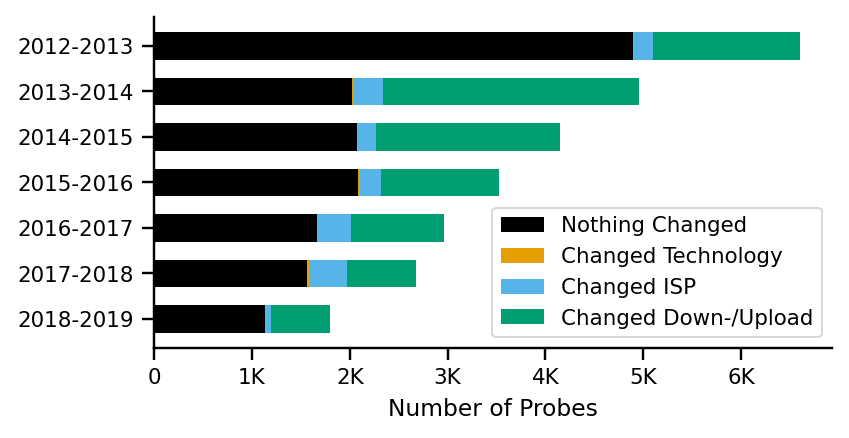

In [95]:
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
df_changed_provider = pd.DataFrame()
for year in years:
    df_tmp_curr = df_tech[df_tech.year == str(year)]
    df_tmp_next = df_tech[df_tech.year == str(year+1)]
    
    df_tmp_curr = df_tmp_curr[df_tmp_curr.technology != "REMOVE"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.technology != 'N/A']
    df_tmp_curr = df_tmp_curr[df_tmp_curr.technology != 'NA']

    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != "REMOVE"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != "remove"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != "MISC"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != "REMOVE - DATA"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != "UNSURE"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != "REMOVE"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != "remove"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != "MISC"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != "REMOVE - DATA"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != "UNSURE"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.download != -1000.0]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.upload != -1000.0]
    

    df_tmp_curr = df_tmp_curr[df_tmp_curr.region != "UNKNOWN"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.region != ""]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.region != "#N/A"]
    df_tmp_curr = df_tmp_curr[df_tmp_curr.region != " "]
    
    
    df_tmp_curr['technology'] = np.where(df_tmp_curr['technology'] == "IPBB", 'DSL', df_tmp_curr['technology'])
    df_tmp_curr['technology'] = np.where(df_tmp_curr['technology'] == "UVERSE", 'DSL', df_tmp_curr['technology'])
    
    df_tmp_next = df_tmp_next[df_tmp_next.technology != "REMOVE"]
    df_tmp_next = df_tmp_next[df_tmp_next.technology != 'N/A']
    df_tmp_next = df_tmp_next[df_tmp_next.technology != 'NA']

    df_tmp_next = df_tmp_next[df_tmp_next.download != "REMOVE"]
    df_tmp_next = df_tmp_next[df_tmp_next.download != "remove"]
    df_tmp_next = df_tmp_next[df_tmp_next.download != "MISC"]
    df_tmp_next = df_tmp_next[df_tmp_next.download != "REMOVE - DATA"]
    df_tmp_next = df_tmp_next[df_tmp_next.download != "UNSURE"]
    df_tmp_next = df_tmp_next[df_tmp_next.upload != "REMOVE"]
    df_tmp_next = df_tmp_next[df_tmp_next.upload != "remove"]
    df_tmp_next = df_tmp_next[df_tmp_next.upload != "MISC"]
    df_tmp_next = df_tmp_next[df_tmp_next.upload != "REMOVE - DATA"]
    df_tmp_next = df_tmp_next[df_tmp_next.upload != "UNSURE"]

    df_tmp_next = df_tmp_next[df_tmp_next.region != "UNKNOWN"]
    df_tmp_next = df_tmp_next[df_tmp_next.region != ""]
    df_tmp_next = df_tmp_next[df_tmp_next.region != "#N/A"]
    df_tmp_next = df_tmp_next[df_tmp_next.region != " "]
    
    df_tmp_next['technology'] = np.where(df_tmp_next['technology'] == "IPBB", 'DSL', df_tmp_next['technology'])
    df_tmp_next['technology'] = np.where(df_tmp_next['technology'] == "UVERSE", 'DSL', df_tmp_next['technology'])
    
    df_changed = pd.merge(df_tmp_curr, df_tmp_next, how='inner', on=['unit_id'])
    df_changed["reason"] = "Nothing Changed"
    df_changed["reason"] = np.where(df_changed.download_x != df_changed.download_y, "Changed Down-/Upload", df_changed["reason"])
    df_changed["reason"] = np.where(df_changed.upload_x != df_changed.upload_y, "Changed Down-/Upload", df_changed["reason"])
    df_changed["reason"] = np.where(df_changed.technology_x != df_changed.technology_y, "Changed Technology", df_changed["reason"])
    df_changed["reason"] = np.where(df_changed.isp_x != df_changed.isp_y, "Changed ISP", df_changed["reason"])
    
    #df_changed = df_changed[(df_changed.technology_x != df_changed.technology_y) | (df_changed.isp_x != df_changed.isp_y) | (df_changed.download_x != df_changed.download_y) | (df_changed.upload_x != df_changed.upload_y)]
    df_changed_provider = pd.concat([df_changed_provider, df_changed], ignore_index=True)
df_changed_provider['descr'] = df_changed_provider['year_x'] + '-' + df_changed_provider['year_y']
#df_changed_provider['changed_provider'] = True
#df_changed_provider = df_changed_provider[['unit_id', 'descr', 'reason']]#, 'changed_provider']]

df_plt = df_changed_provider.groupby(['descr', 'reason']).agg({'unit_id':pd.Series.nunique}).reset_index()
fig, ax = plt.subplots(figsize=(5, 2.5))

dfplt = df_plt.sort_values('unit_id', ascending=False)
#fix df for plot
for reason in dfplt['reason'].value_counts().index.tolist():
    for descr in dfplt['descr'].value_counts().index.tolist():
        if len(dfplt[(dfplt.descr == descr) & (dfplt.reason == reason)]) == 0:
            dfplt = dfplt.append({'reason':reason,'descr':descr,'unit_id':0}, ignore_index=True)

dfplt = dfplt.sort_values('unit_id', ascending=False)

bar_width = 0.6
curr_index = sorted(dfplt['descr'].value_counts().index.tolist())
curr_val = []
prev_val = [0] * len(curr_index)

p_list = []

for reason in sorted(dfplt['reason'].value_counts().index.tolist(), reverse=True):
    curr_val = dfplt[dfplt.reason == reason].sort_values('descr').unit_id.values.tolist()
    #print(curr_val)
    tmp_p = ax.barh(curr_index, curr_val, bar_width, left=prev_val)
    for bottom_val_index in range(len(curr_index)):
        prev_val[bottom_val_index] = prev_val[bottom_val_index]+curr_val[bottom_val_index]
    p_list.append(tmp_p)

    
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,y: human_format(x)))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#ax1.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.0))
    
#ax.set_xlim(0,6000)
ax.set_xlabel('Number of Probes')
ax.set_title('')
ax.set_yticklabels(curr_index)
ax.invert_yaxis()

plt.legend([tmp_p[0] for tmp_p in p_list], sorted(dfplt['reason'].value_counts().index.tolist(), reverse=True))

plt.savefig('Provider_Changes.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [56]:
df_changed_provider[(df_changed_provider.descr == '2012-2013') & (df_changed_provider.reason == 'Changed Down-/Upload')][['upload_x','download_x','upload_y','download_y']]

,upload_x,download_x,upload_y,download_y
0,35.0,35.0,35,35
1,5.0,30.0,5,30
2,2.0,15.0,2,15
3,0.768,3.0,0.768,3
4,1.0,10.0,1,10
...,...,...,...,...
6584,5.0,40.0,5,40
6585,0.768,7.0,0.768,7
6586,0.896,5.0,0.896,5
6587,0.896,5.0,0.896,5


In [13]:
df_changed_provider

,unit_id,isp_x,download_x,upload_x,technology_x,state_x,region_x,tz_offset_x,tz_offset_dst_x,year_x,...,upload_y,technology_y,state_y,region_y,tz_offset_y,tz_offset_dst_y,year_y,month_y,reason,descr
0,11,Verizon,35,35,FIBER,MA,NORTHEAST,-5,-4,2012,...,35,FIBER,MA,NORTHEAST,-5,-4,2013,09,Nothing Changed,2012-2013
1,11,Verizon,35.0,35.0,FIBER,MA,NORTHEAST,-5,-4,2012,...,35,FIBER,MA,NORTHEAST,-5,-4,2013,09,Changed Down-/Upload,2012-2013
2,358,Comcast,105,10,CABLE,VA,SOUTH,-5,-4,2012,...,20,CABLE,VA,SOUTH,-5,-4,2013,09,Changed Down-/Upload,2012-2013
3,360,Comcast,15,2,CABLE,VA,SOUTH,-5,-4,2012,...,4,CABLE,VA,SOUTH,-5,-4,2013,09,Changed Down-/Upload,2012-2013
4,365,Cablevision,15,2,CABLE,NY,NORTHEAST,-5,-4,2012,...,5,CABLE,NY,NORTHEAST,-5,-4,2013,09,Changed Down-/Upload,2012-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22578,948960,Time Warner Cable,300,20,CABLE,KY,SOUTH,-5,-4,2016,...,20,CABLE,KY,SOUTH,-5,-4,2017,09,Changed ISP,2016-2017
22579,948992,CenturyLink,20,0.896,DSL,AZ,WEST,-7,-7,2016,...,0.896,DSL,AZ,WEST,-7,-7,2017,09,Nothing Changed,2016-2017
22580,949042,AT&T,3,0.512,DSL,CA,WEST,-8,-7,2016,...,0.512,DSL,CA,WEST,-8,-7,2017,09,Nothing Changed,2016-2017
22581,949064,Cincinnati Bell,30,3,DSL,KY,SOUTH,-5,-4,2016,...,3,DSL,KY,SOUTH,-5,-4,2017,09,Nothing Changed,2016-2017


In [104]:
print(df_tech[(df_tech.technology != 'REMOVE') & (df_tech.year == '2019')].groupby(['isp', 'technology']).agg({'unit_id':pd.Series.nunique}).sort_values('unit_id', ascending=False).to_latex())

\begin{tabular}{llr}
\toprule
        &     &  unit\_id \\
isp & technology &          \\
\midrule
CenturyLink & DSL &      564 \\
Windstream & DSL &      351 \\
Comcast & CABLE &      316 \\
Frontier & DSL &      270 \\
Charter & CABLE &      238 \\
Frontier & FIBER &      233 \\
Cox & CABLE &      224 \\
Verizon & FIBER &      201 \\
AT\&T & DSL &      174 \\
Cincinnati Bell & FIBER &      155 \\
Optimum & CABLE &      155 \\
Cincinnati Bell & DSL &      126 \\
Mediacom & CABLE &      123 \\
Verizon & DSL &       62 \\
\bottomrule
\end{tabular}



In [101]:
df_tech[df_tech.year == '2019'].unit_id.nunique()

3192

In [102]:
df_tech[(df_tech.technology != 'REMOVE') & (df_tech.year == '2019')].unit_id.nunique()

3192

In [98]:
df_tech[df_tech.year == '2019'].technology.value_counts()

DSL      1547
CABLE    1056
FIBER     589
Name: technology, dtype: int64

In [100]:
df_tech[(df_tech.technology != 'REMOVE') & (df_tech.year == '2019')][['isp', 'technology']].drop_duplicates()

,isp,technology
33397,Verizon,FIBER
33398,Charter,CABLE
33401,AT&T,DSL
33402,Cox,CABLE
33404,Comcast,CABLE
33408,Optimum,CABLE
33409,CenturyLink,DSL
33410,Frontier,DSL
33412,Frontier,FIBER
33426,Windstream,DSL


In [103]:
df_tech[df_tech.year == '2019'].isp.unique()

array(['Verizon', 'Charter', 'AT&T', 'Cox', 'Comcast', 'Optimum',
       'CenturyLink', 'Frontier', 'Windstream', 'Mediacom',
       'Cincinnati Bell'], dtype=object)